
# **Correlation Does Not Equal Causation**
#### An Introduction to Exploratory Analyses and Inferential Statistics with Python!

![](https://media.makeameme.org/created/one-does-not-5aed73.jpg)

# Introduction

For today's lesson, we will be working with the dataset **combined_df.csv** that we have created in a previous lesson. We will be looking at student aid for different universities and how that relates to university size, the endowment available, the median SAT score, and the state where the university is located. To do this we will have to do some exploratory analyses and dive into some inferential statistics and hypothesis testing. 

# Loading In Data

First, we need to load in the data. This notebook and the data can be found on the CADS Github [Instert Link]. We will be using the **combined_df.csv** dataset. 

You may need to mount your Google drive to do this successfully. The code is below. 

In [2]:
# You may need to run this cell to connect the notebook to your individual Google Drive. 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
# Importing the Pandas Library

import pandas as pd # Labeling this as pd is a standard practice. 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading in the data. Please input the direct path from your drive. 
combined_df = pd.read_csv('/###Adjust Path Here###/') # Adjust File Path As Needed!

In [5]:
# Loading in the actual data. Please input the direct path from your drive. 
combined_df = pd.read_csv('/content/drive/MyDrive/2021-2022 CADS/Tech Chair Workshop Planning /Workshop 2: Correlation Does Not Equal Causation/combined_df.csv')

In [6]:
# Checking the data import
combined_df.head()

,unitid,chronname,city,state,level,hbcu,long_x,lat_y,site,student_count,med_sat_value,aid_value,endow_value,Other,Female,Male,Asian,American Indian,Black,Hispanic,White,Unknown
0,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,NaN,-86.809170,33.502230,www.uab.edu,11502,1146.0,6088.0,24136.0,144,144,144,72,72,72,72,72,72
1,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,NaN,-86.638420,34.722818,www.uah.edu,5696,1180.0,6647.0,11502.0,144,144,144,72,72,72,72,72,72
2,100724,Alabama State University,Montgomery,Alabama,4-year,X,-86.295677,32.364317,www.alasu.edu/email/index.aspx,5356,830.0,7256.0,13202.0,144,144,144,72,72,72,72,72,72
3,100751,University of Alabama at Tuscaloosa,Tuscaloosa,Alabama,4-year,NaN,-87.545766,33.214400,www.ua.edu/,29440,1171.0,10390.0,19469.0,144,144,144,72,72,72,72,72,72
4,100830,Auburn University at Montgomery,Montgomery,Alabama,4-year,NaN,-86.177351,32.369939,www.aum.edu,4322,970.0,4327.0,10736.0,144,144,144,72,72,72,72,72,72


# Preliminary Exploration - Top 10 Analyses

Now that we have our data imported, we can start to explore some initial questions. As mentioned above, our variables of focus include student count, student aid values, the endowment values, the median SAT score, and the State. We can start to explore these values by first looking at the top ten values for each of those variables. This helps us get a feel for the max range of the data and to see if our data maintains common sense. 

In [67]:
combined_df[['chronname', 'student_count']].sort_values('student_count', ascending = False).head(10)

,chronname,student_count
160,University of Central Florida,51333
1193,Liberty University,47464
857,Ohio State University,44201
1148,Texas A&M University at College Station,44072
976,Pennsylvania State University at University Park,40085
1150,University of Texas at Austin,39979
171,Florida International University,39142
23,Arizona State University at Tempe,38730
519,Michigan State University,37985
310,Indiana University at Bloomington,36862


In [68]:
combined_df[['chronname', 'aid_value']].sort_values('aid_value', ascending = False).head(10)

,chronname,aid_value
448,Amherst College,41580.0
145,Yale University,41085.0
681,Cooper Union for the Advancement of Science an...,39802.0
935,Haverford College,39176.0
143,Trinity College (Conn.),39161.0
761,Vassar College,38545.0
466,Harvard University,38381.0
495,Williams College,38309.0
1283,Stanford University,38105.0
1101,Vanderbilt University,37771.0


### Try it out on your own!

In [ ]:
# Enter Your Solution Here

In [ ]:
#@title Solution is hidden. Double click to see it.

combined_df[['chronname', 'endow_value']].sort_values('endow_value', ascending = False).head(10)

combined_df[['chronname', 'med_sat_value']].sort_values('med_sat_value', ascending = False).head(10)

# Preliminary Statistics

Now that we have quickly looked at the top ten for our variables of interest, our next step is to get some basic stats of that data as well. 

In [72]:
combined_df[['student_count', 'aid_value', 'endow_value', 'med_sat_value']].describe()

,student_count,aid_value,endow_value,med_sat_value
count,1303.000000,1303.000000,1.303000e+03,1303.000000
mean,5756.003837,12875.875672,4.938504e+04,1062.413661
std,7403.819111,7516.011605,1.570608e+05,132.430645
min,85.000000,1184.000000,8.000000e+00,666.000000
25%,1360.000000,6763.500000,4.335500e+03,976.000000
50%,2625.000000,11409.000000,1.147400e+04,1044.000000
75%,6615.500000,16873.500000,3.266800e+04,1125.000000
max,51333.000000,41580.000000,2.505435e+06,1534.000000


# Creating Histograms

And, we can follow that up by creating some Histograms! 

Text(0.5, 1.0, 'Histogram of Student Counts')

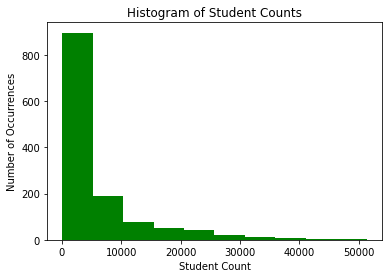

In [84]:
ax = combined_df['student_count'].plot.hist(color='Green') # Will need to take the log of these np.log()
 
ax.set_xlabel("Student Count")
ax.set_ylabel("Number of Occurrences")
ax.set_title("Histogram of Student Counts")

Text(0.5, 1.0, 'Histogram of Aid Values')

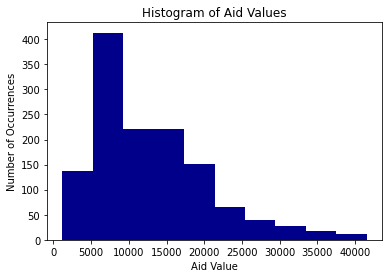

In [109]:
ax = combined_df['aid_value'].plot.hist(color='DarkBlue')
 
ax.set_xlabel("Aid Value")
ax.set_ylabel("Number of Occurrences")
ax.set_title("Histogram of Aid Values")

### Try it out on your own!

In [ ]:
# Enter Your Solution Here

In [ ]:
#@title Solution is hidden. Double click to see it.

ax = combined_df['endow_value'].plot.hist(color='Red') # Will need to take the log of these values. 
 
ax.set_xlabel("Endowment Value")
ax.set_ylabel("Number of Occurrences")
ax.set_title("Histogram of Endowment Values")

In [ ]:
#@title Solution is hidden. Double click to see it.

ax = combined_df['med_sat_value'].plot.hist(color='Yellow') # This can stay as it is for now. 
 
ax.set_xlabel("Median SAT Score")
ax.set_ylabel("Number of Occurrences")
ax.set_title("Histogram of Median SAT Score")

# Correcting Some of Our Data with Data Transformations
For many inferential statistical analyses, there is an assumption regarding the normality of data. We need our data to fit a more normal curve in order for our tests' assumptions to hold true, and in turn, to be a valid approach. 

One common method is just removing outliers. Today we will use the inter-quartile range to determine outliers. 

Another approach is to apply a transformation to our data. For some of our data, we will apply a simple log transformation. 

### Correcting Aid Value By Removing Outliers

In [ ]:
IQR = (16873.5 - 6763.5)*1.5 + 16873.5

combined_df["corr_aid_value"] = combined_df['aid_value'].apply(lambda x: IQR if x > IQR else x) 

Text(0.5, 1.0, 'Boxplot of Aid Values')

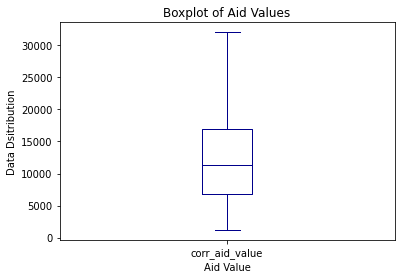

In [112]:
ax = combined_df['corr_aid_value'].plot.box(color='DarkBlue')
 
ax.set_xlabel("Aid Value")
ax.set_ylabel("Data Dsitribution")
ax.set_title("Boxplot of Aid Values")

### Correcting Student Count By Taking The Log

Text(0.5, 1.0, 'Histogram of Log of Student Counts')

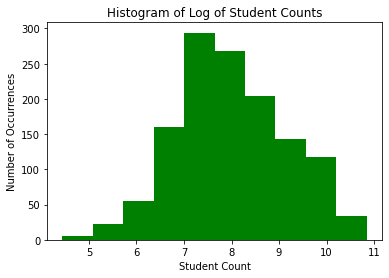

In [114]:
combined_df['log_student_count'] = np.log(combined_df['student_count'])

ax = combined_df['log_student_count'].plot.hist(color='Green') 
 
ax.set_xlabel("Student Count")
ax.set_ylabel("Number of Occurrences")
ax.set_title("Histogram of Log of Student Counts")

### Correcting Endowment Value By Taking The Log

Text(0.5, 1.0, 'Histogram of Log of Endowment Values')

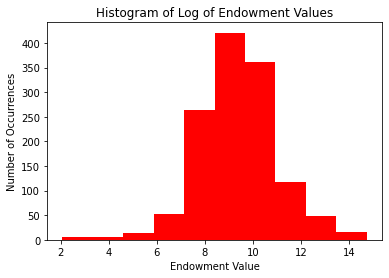

In [115]:
combined_df['log_endow_value'] = np.log(combined_df['endow_value'])

ax = combined_df['log_endow_value'].plot.hist(color='Red') # Will need to take the log of these values. 
 
ax.set_xlabel("Endowment Value")
ax.set_ylabel("Number of Occurrences")
ax.set_title("Histogram of Log of Endowment Values")

# Looking Into Statistics By State

Here we are going to look at the overall descriptive stats for each of our variables of interest, but we will group the data by state to see what the values are for each state. We are first going to use the original values to identify the differences here. 

In [11]:
combined_df[['state', 'student_count']].groupby('state').describe() #'med_sat_value', 'aid_value', 'endow_value'

student_count                ...                   
                             count          mean  ...       75%      max
state                                             ...                   
Alabama                       22.0   5446.636364  ...   5834.75  29440.0
Alaska                         1.0    387.000000  ...    387.00    387.0
Arizona                        6.0  15936.500000  ...  29292.50  38730.0
Arkansas                      18.0   5076.222222  ...   9108.00  21009.0
California                    82.0   8725.304878  ...  15593.75  33771.0
Colorado                      11.0   8532.363636  ...   9761.50  23548.0
Connecticut                   13.0   5663.923077  ...   6542.00  18032.0
Delaware                       3.0   7993.000000  ...  11189.50  18487.0
District of Columbia           6.0   6182.833333  ...   7562.00  10357.0
Florida                       41.0   8251.073171  ...   8930.00  51333.0
Georgia                       39.0   5763.615385  ...   6953.00  26278.0
Hawaii                         6.0   5136.166667  ...   5050.75  14499.0
Idaho                          6.0  10524.166667  ...  16654.50  27692.0
Illinois                      47.0   5221.489362  ...   7025.00  32695.0
Indiana                       41.0   5911.292683  ...   6148.00  36862.0
Iowa                          23.0   3549.304348  ...   1912.00  27659.0
Kansas                        22.0   3206.727273  ...   2624.50  19217.0
Kentucky                      24.0   5255.958333  ...   9398.00  21441.0
Louisiana                     18.0   5905.611111  ...   7770.75  24923.0
Maine                         12.0   2569.416667  ...   2425.75   9182.0
Maryland                      20.0   5606.050000  ...   6150.75  26658.0
Massachusetts                 51.0   4489.549020  ...   5368.00  22134.0
Michigan                      35.0   7703.428571  ...  11320.00  37985.0
Minnesota                     29.0   4730.793103  ...   3559.00  34449.0
Mississippi                   16.0   4921.812500  ...   5603.25  16677.0
Missouri                      35.0   4403.200000  ...   5742.50  26928.0
Montana                        6.0   5156.833333  ...   9651.50  13174.0
Nebraska                      14.0   3662.357143  ...   3538.75  19376.0
Nevada                         2.0  19395.500000  ...  21246.25  23097.0
New Hampshire                  7.0   5201.142857  ...   4537.50  18083.0
New Jersey                    26.0   6576.000000  ...   7292.00  33901.0
New Mexico                     5.0   8527.800000  ...  13582.00  22416.0
New York                      94.0   5734.978723  ...   7979.75  22615.0
North Carolina                48.0   4867.312500  ...   5471.50  24536.0
North Dakota                   7.0   4655.000000  ...   7489.00  11948.0
Ohio                          50.0   5691.860000  ...   3845.00  44201.0
Oklahoma                      18.0   5244.611111  ...   4395.25  20985.0
Oregon                        18.0   5776.888889  ...   5038.75  23157.0
Pennsylvania                 112.0   3643.750000  ...   3732.75  40085.0
Rhode Island                   7.0   5538.142857  ...   6980.00  13354.0
South Carolina                30.0   3878.133333  ...   3224.50  24180.0
South Dakota                   7.0   3268.000000  ...   3439.00  10969.0
Tennessee                     43.0   4460.883721  ...   5860.00  21182.0
Texas                         63.0   8363.682540  ...   9472.50  44072.0
Utah                           5.0  17190.800000  ...  24492.00  27765.0
Vermont                        7.0   3059.285714  ...   2696.50  10912.0
Virginia                      42.0   6057.880952  ...   5088.75  47464.0
Washington                    17.0   7377.588235  ...  10423.00  29756.0
West Virginia                 17.0   3314.647059  ...   2622.00  22757.0
Wisconsin                     30.0   6332.866667  ...   9076.00  30728.0
Wyoming                        1.0  10117.000000  ...  10117.00  10117.0

[51 rows x 8 columns]

### Try it out on your own!

In [ ]:
# Enter your solution here. 

# Creating Top 15 State Bar Charts

Now that we have those stats, lets take a look at the top states for each of our variables. This is more of an exploratory step. 

Text(0.5, 1.0, 'Average Student Count For Each State')

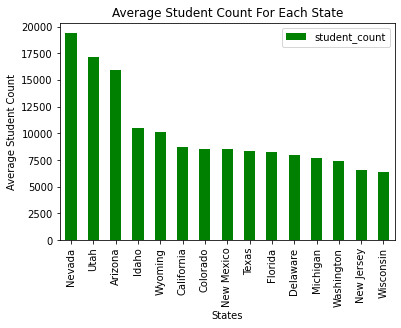

In [116]:
# Getting the mean value for each state. 
state_students = combined_df[['state', 'student_count']].groupby('state').mean().reset_index()

# Plotting the Top 15. 
ax = state_students.sort_values('student_count', ascending = False).head(15).plot.bar(x = 'state', y = 'student_count', color ='Green')
 
ax.set_xlabel("States")
ax.set_ylabel("Average Student Count")
ax.set_title("Average Student Count For Each State")

Text(0.5, 1.0, 'Average Aid Recieved For Each State')

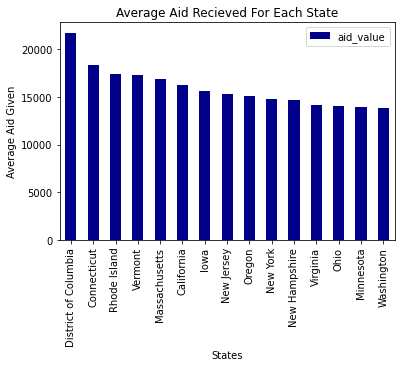

In [118]:
state_aid = combined_df[['state', 'aid_value']].groupby('state').mean().reset_index()

ax = state_aid.sort_values('aid_value', ascending = False).head(15).plot.bar(x = 'state', y = 'aid_value', color = 'DarkBlue')
 
ax.set_xlabel("States")
ax.set_ylabel("Average Aid Given")
ax.set_title("Average Aid Recieved For Each State")

### Try it out on your own. 

Try to create top 15 bar chars for the endowment value and the median sat value. 

In [ ]:
# Enter Your Solution Here. 

In [ ]:
#@title Solution is hidden. Double click to see it.

state_endow = combined_df[['state', 'endow_value']].groupby('state').mean().reset_index()

ax = state_endow.sort_values('endow_value', ascending = False).head(15).plot.bar(x = 'state', y = 'endow_value', color = 'Red')
 
ax.set_xlabel("States")
ax.set_ylabel("Average Endowment Available")
ax.set_title("Average Endowment For Each State")

In [ ]:
#@title Solution is hidden. Double click to see it.

state_sat = combined_df[['state', 'med_sat_value']].groupby('state').mean().reset_index()

ax = state_sat.sort_values('med_sat_value', ascending = False).head(15).plot.bar(x = 'state', y = 'med_sat_value', color = 'Yellow')
 
ax.set_xlabel("States")
ax.set_ylabel("Median SAT Score")
ax.set_title("Average Median SAT Score For Each State")

# Question: Which States Differ From Eachother?
Let's look at each of our variables and identify the states that significantly differ from the mean for that variable. To do this, we will conduct a basic Anova test. This will tell us if the state means differ from eachother. We will then perform post-hoc tests, using the Tukey-HSD approach. 

In [41]:
# ANOVA - Differences in aid value for each state. Are there differences among groups? Where do those differences occur?

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

F, p = stats.f_oneway(combined_df[combined_df['state'] == 'Alabama'].aid_value,
                      combined_df[combined_df['state'] == 'Alaska'].aid_value,
                      combined_df[combined_df['state'] == 'Arizona'].aid_value,
                      combined_df[combined_df['state'] == 'Arkansas'].aid_value,
                      combined_df[combined_df['state'] == 'California'].aid_value,
                      combined_df[combined_df['state'] == 'Colorado'].aid_value,
                      combined_df[combined_df['state'] == 'Connecticut'].aid_value,
                      combined_df[combined_df['state'] == 'Delaware'].aid_value,
                      combined_df[combined_df['state'] == 'District of Columbia'].aid_value,
                      combined_df[combined_df['state'] == 'Florida'].aid_value,
                      combined_df[combined_df['state'] == 'Georgia'].aid_value,
                      combined_df[combined_df['state'] == 'Hawaii'].aid_value,
                      combined_df[combined_df['state'] == 'Idaho'].aid_value,
                      combined_df[combined_df['state'] == 'Illinois'].aid_value,
                      combined_df[combined_df['state'] == 'Indiana'].aid_value,
                      combined_df[combined_df['state'] == 'Iowa'].aid_value,
                      combined_df[combined_df['state'] == 'Kansas'].aid_value,
                      combined_df[combined_df['state'] == 'Kentucky'].aid_value,
                      combined_df[combined_df['state'] == 'Louisiana'].aid_value,
                      combined_df[combined_df['state'] == 'Maine'].aid_value,
                      combined_df[combined_df['state'] == 'Maryland'].aid_value,
                      combined_df[combined_df['state'] == 'Massachusetts'].aid_value,
                      combined_df[combined_df['state'] == 'Michigan'].aid_value,
                      combined_df[combined_df['state'] == 'Minnesota'].aid_value,
                      combined_df[combined_df['state'] == 'Mississippi'].aid_value,
                      combined_df[combined_df['state'] == 'Missouri'].aid_value,
                      combined_df[combined_df['state'] == 'Montana'].aid_value,
                      combined_df[combined_df['state'] == 'Nebraska'].aid_value,
                      combined_df[combined_df['state'] == 'Nevada'].aid_value,
                      combined_df[combined_df['state'] == 'New Hampshire'].aid_value,
                      combined_df[combined_df['state'] == 'New Jersey'].aid_value,
                      combined_df[combined_df['state'] == 'New Mexico'].aid_value,
                      combined_df[combined_df['state'] == 'New York'].aid_value,
                      combined_df[combined_df['state'] == 'North Carolina'].aid_value,
                      combined_df[combined_df['state'] == 'North Dakota'].aid_value,
                      combined_df[combined_df['state'] == 'Ohio'].aid_value,
                      combined_df[combined_df['state'] == 'Oklahoma'].aid_value,
                      combined_df[combined_df['state'] == 'Oregon'].aid_value,
                      combined_df[combined_df['state'] == 'Pennsylvania'].aid_value,
                      combined_df[combined_df['state'] == 'Rhode Island'].aid_value,
                      combined_df[combined_df['state'] == 'South Carolina'].aid_value,
                      combined_df[combined_df['state'] == 'South Dakota'].aid_value,
                      combined_df[combined_df['state'] == 'Tennessee'].aid_value,
                      combined_df[combined_df['state'] == 'Texas'].aid_value,
                      combined_df[combined_df['state'] == 'Utah'].aid_value,
                      combined_df[combined_df['state'] == 'Vermont'].aid_value,
                      combined_df[combined_df['state'] == 'Virginia'].aid_value,
                      combined_df[combined_df['state'] == 'Washington'].aid_value,
                      combined_df[combined_df['state'] == 'West Virginia'].aid_value,
                      combined_df[combined_df['state'] == 'Wisconsin'].aid_value,
                      combined_df[combined_df['state'] == 'Wyoming'].student_count)

result_df = pd.DataFrame([[round(F, 5), round(p, 5)]], columns=['F-statistic', 'p-value'])

m_comp = pairwise_tukeyhsd(endog=combined_df['aid_value'],
                           groups=list(combined_df['state']), alpha=0.05)

tukey_data = pd.DataFrame(data=m_comp._results_table.data[1:],
                              columns=['Group 1', 'Group 2', 'Mean Difference', 'Adjusted p-value',
                                       'Lower', 'Upper', 'Reject Null?'])

In [43]:
result_df

,F-statistic,p-value
0,3.25126,0.0


In [44]:
tukey_data[tukey_data["Reject Null?"] == True]

,Group 1,Group 2,Mean Difference,Adjusted p-value,Lower,Upper,Reject Null?
3,Alabama,California,7229.1319,0.0274,284.8886,14173.3752,True
20,Alabama,Massachusetts,7870.1578,0.0184,492.9583,15247.3572,True
198,California,Florida,-5612.0732,0.0408,-11144.0484,-80.0980,True
199,California,Georgia,-5887.2683,0.0251,-11513.0125,-261.5241,True
213,California,Mississippi,-8512.7683,0.0156,-16417.2363,-608.3003,True
225,California,Oklahoma,-7854.5461,0.0264,-15382.6108,-326.4813,True
232,California,Texas,-6017.0461,0.0010,-10862.4872,-1171.6049,True
238,California,Wisconsin,-6578.5016,0.0186,-12749.6783,-407.3249,True
387,District of Columbia,Mississippi,-13999.5000,0.0428,-27844.7961,-154.2039,True
397,District of Columbia,North Dakota,-16157.7143,0.0472,-32248.3631,-67.0655,True


# Question: How Are Student Count And Aid Related?

Next, let's look at the association between student count and aid. This is done regardless of state and is exploring the overall relationship between the two variables. To do this, we will first look at a scatter plot, and then conduct a correlation. For these analyses, we will use our corrected values. 

Examining correlations is an important step because it helps us identify relationships between variables. Many statistical approaches assume limited multicollinearity. Therefore, this assumption should be checked when developing a model. 

Text(0.5, 1.0, 'Aid Value By Student Count')

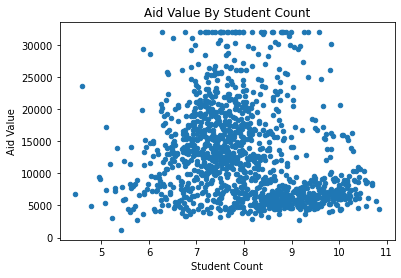

In [134]:
ax = combined_df.plot.scatter('log_student_count', 'corr_aid_value')
 
ax.set_xlabel("Student Count")
ax.set_ylabel("Aid Value")
ax.set_title("Aid Value By Student Count")

In [135]:
cor = combined_df[['log_student_count', 'corr_aid_value']].corr()
cor

,log_student_count,corr_aid_value
log_student_count,1.000000,-0.234673
corr_aid_value,-0.234673,1.000000


# Question: How Are Student Count And Endowment Related?

Let's look at the student count and its relationship to endowment value. Try this one on your own. Remember to use the corrected values. The solution is below. 

In [ ]:
# Enter your solution here. 

In [ ]:
#@title Solution is hidden. Double click to see it.
ax = combined_df.plot.scatter('log_student_count', 'log_endow_value')
 
ax.set_xlabel("Student Count")
ax.set_ylabel("Endowment Value")
ax.set_title("Endowment Value By Student Count")

In [ ]:
#@title Solution is hidden. Double click to see it.

cor = combined_df[['log_student_count', 'log_endow_value']].corr()
cor

# Question: How are Student Aid and Endowment Related?

Let's look at student aid and available endowment. Please try this one on your own. Remember to use the corrected values. The solution is below. 

In [ ]:
# Enter your solution here. 

In [ ]:
#@title Solution is hidden. Double click to see it.

ax = combined_df.plot.scatter('corr_aid_value', 'log_endow_value', c='DarkBlue')
 
ax.set_xlabel("Aid Value")
ax.set_ylabel("Endowment Value")
ax.set_title("Aid Value Compared to Endowment Value")

In [ ]:
#@title Solution is hidden. Double click to see it.

cor = combined_df[['corr_aid_value', 'log_endow_value']].corr()
cor

# Linear Regression Model

Finally, let's see if we can generate a regression model. This will help us explain variance within our dataset and can help us develop stronger claims. While this is not causality in itself, regressions help us quantify relationships between variables. We will start with a simple regression and move to a more complex one. 

In [140]:
import statsmodels.formula.api as sm

# Creating a Simple Model
formula = 'corr_aid_value ~ log_endow_value'
model = sm.ols(formula = formula, data = combined_df)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         corr_aid_value   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     1140.
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          5.66e-180
Time:                        21:39:13   Log-Likelihood:                -13009.
No. Observations:                1303   AIC:                         2.602e+04
Df Residuals:                    1301   BIC:                         2.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -1.56e+04    852.610    -

In [141]:
# Developing a more robust model.
formula = 'corr_aid_value ~ log_endow_value + log_student_count + med_sat_value'
model = sm.ols(formula = formula, data = combined_df)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         corr_aid_value   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     520.3
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          5.35e-222
Time:                        21:39:33   Log-Likelihood:                -12905.
No. Observations:                1303   AIC:                         2.582e+04
Df Residuals:                    1299   BIC:                         2.584e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.284e+04   1372.89

In [142]:
# Adding States to the model. 
formula = 'corr_aid_value ~ log_endow_value + log_student_count + med_sat_value + state'
model = sm.ols(formula = formula, data = combined_df)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         corr_aid_value   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     37.47
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          1.28e-218
Time:                        21:39:52   Log-Likelihood:                -12799.
No. Observations:                1303   AIC:                         2.571e+04
Df Residuals:                    1249   BIC:                         2.599e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

# Conclusions

Overall this case has taken us through some major statistical approaches. Granted significant consideration needs to be paid to developing robust models and highly confident findings. This case is designed to be a quick introduction and to fcous on some main concepts, but it is not exhaustive and it quickly covers a lot of material. You are encouraged to continue learning and to continue studying, but hopefully this case has touched on the major things one would need to build up a statistical analysis. 

## Resources

A Complete Guide to Confidence Interval, t-test, and z-test in R for Data Scientists: https://pub.towardsai.net/a-complete-guide-to-confidence-interval-t-test-and-z-test-in-r-for-data-scientists-cd16dd2d0eec

Understanding Multicollinearity and How to Detect it in Python: https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc


